In [323]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

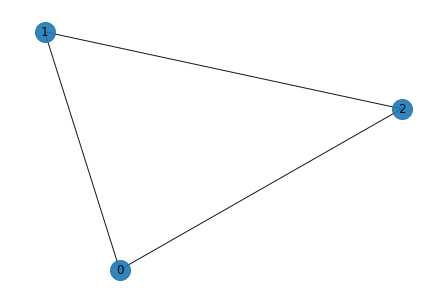

In [2]:
G = nx.Graph()
G.add_nodes_from([0,1,2])
G.add_edges_from([(0,1),(1,2),(0,2)])
nx.draw(G,with_labels=True,alpha=0.9,node_size=400)

In [5]:
logical_basis = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            logical_basis.append([i,j,k])

In [8]:
logical_basis

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

In [21]:
def k_body_fix(positions,logical_basis):
    spurious_states = []
    filtered_states = []
    for state in logical_basis:
        if reduced_state(positions,state).count(0)%2!=0:
            spurious_states.append(state)
        else:
            filtered_states.append(state)
    return spurious_states,filtered_states

In [22]:
def reduced_state(positions,state):
    reduced_state = []
    for position in positions:
        reduced_state.append(state[position])
    return reduced_state

In [45]:
k_body_fix([0,1,2],logical_basis)[0]

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [1, 0, 1, 0],
 [1, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 1, 0, 1]]

In [46]:
k_body_fix([0,1,2],logical_basis)[1]

[[0, 0, 1, 0],
 [0, 0, 1, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 1, 1, 0],
 [1, 1, 1, 1]]

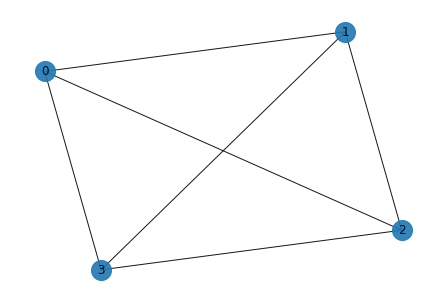

In [41]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([(0,1),(1,2),(2,3),(3,0),(1,3),(2,0),(3,1)])
nx.draw(G,with_labels=True,alpha=0.9,node_size=400)

In [23]:
logical_basis = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                logical_basis.append([i,j,k,l])

In [24]:
len(logical_basis)

16

In [48]:
k_body_fix([0,1,2],logical_basis)[0]

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [1, 0, 1, 0],
 [1, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 1, 0, 1]]

In [194]:
def log_to_phys(state):
    pos = 0;
    phys_state = [];
    while pos < len(state)-1 :
        phys_state.append((state[pos]+state[pos+1] + 1)%2)
        pos+=1
    phys_state.append((state[0]+state[-1] + 1)%2)
    for i in range(len(state)):
        for j in range(len(state)):
            if i<j:
                phys_state.append((state[i]+state[j] + 1)%2)
    return phys_state

In [198]:
def standardize_state(state,length):
    off_length = length - len(state)
    if off_length > 0 :
        standard_state = [0 for i in range(off_length)] + state
        return standard_state
    else:
        return state

In [197]:
def generate_basis(n):
    basis = []
    for element in range(2**n):
        basis.append([int(x) for x in list(bin(element)[2:])])
    generated_basis = [standardize_state(state,len(basis[-1])) for state in basis]
    return generated_basis

In [199]:
induced_states = [log_to_phys(state) for state in logical_basis]

In [200]:
def remove_duplicates(induced_states):
    unique_states = []
    for state in induced_states:
        if state not in unique_states:
            unique_states.append(state)
    return unique_states

In [201]:
unique_states = remove_duplicates(induced_states)

In [202]:
len(unique_states)

16

In [203]:
def sub_state(sites,state):
    reduced_state = []
    for site in sites:
        reduced_state.append(state[site])
    return reduced_state

In [204]:
constraintB = [sub_state([1,3,4,5],state) for state in unique_states]

In [35]:
constraintB

[[1, 1, 1, 1],
 [1, 0, 1, 0],
 [0, 1, 0, 1],
 [0, 0, 0, 0],
 [0, 1, 1, 0],
 [0, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 0, 0, 1]]

In [36]:
def check_even(state):
    if state.count(0) % 2 == 0:
        return True
    else:
        return False

In [37]:
[check_even(state) for state in constraintB]

[True, True, True, True, True, True, True, True]

In [38]:
constraintA = [sub_state([0,1,4],state) for state in unique_states]

In [39]:
constraintA

[[1, 1, 1],
 [1, 1, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0]]

In [40]:
[check_even(state) for state in constraintB]

[True, True, True, True, True, True, True, True]

In [41]:
constraintC = [sub_state([1,2,5],state) for state in unique_states]

In [42]:
constraintC

[[1, 1, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 1, 1]]

In [43]:
[check_even(state) for state in constraintC]

[True, True, True, True, True, True, True, True]

This proves that all states generated via the parity mapping of logical states into physical states automatically satisfy the traced subspace constraint of holonomies. We need to understand the other way around, i.e, do all constraints on the space of all physical configurations generate only the states correspinding to Parity(logical_states)?

In [44]:
logical_basis = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                for m in range(2):
                    for n in range(2):
                        logical_basis.append([i,j,k,l,m,n])

In [59]:
constraintB = k_body_fix([1,3,4,5],logical_basis)[1]

In [60]:
constraintBA = k_body_fix([0,1,4],constraintB)[1]

In [61]:
constraintBAC = k_body_fix([1,2,5],constraintBA)[1]

In [62]:
constraintBAC.sort()

In [63]:
unique_states.sort()

In [64]:
constraintBAC

[[0, 0, 0, 0, 1, 1],
 [0, 0, 1, 1, 1, 0],
 [0, 1, 0, 1, 0, 0],
 [0, 1, 1, 0, 0, 1],
 [1, 0, 0, 1, 0, 1],
 [1, 0, 1, 0, 0, 0],
 [1, 1, 0, 0, 1, 0],
 [1, 1, 1, 1, 1, 1]]

In [65]:
unique_states

[[0, 0, 0, 0, 1, 1],
 [0, 0, 1, 1, 1, 0],
 [0, 1, 0, 1, 0, 0],
 [0, 1, 1, 0, 0, 1],
 [1, 0, 0, 1, 0, 1],
 [1, 0, 1, 0, 0, 0],
 [1, 1, 0, 0, 1, 0],
 [1, 1, 1, 1, 1, 1]]

In [66]:
unique_states == constraintextra

True

The constraints indeed map the space of physical configurations into the space Parity(logical_states)

Let's consider the next-to-trivial example of 5 qubits with all-to-all connectivity

In [205]:
edges = []
for i in range(5):
    for j in range(5):
        if j>i:
            edges.append((i,j))

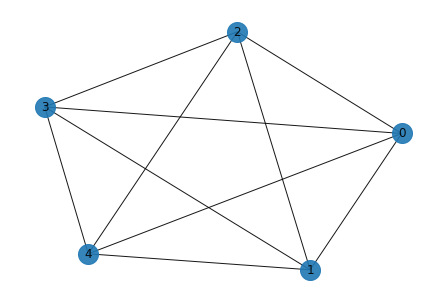

In [206]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4])
nx.draw(G,with_labels=True,alpha=0.9,node_size
G.add_edges_from(edges)=400)

In [207]:
logical_basis = generate_basis(5)

In [208]:
parity_basis = remove_duplicates([log_to_phys(state) for state in logical_basis])

In [209]:
len(parity_basis)

16

In [210]:
parity_basis

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0],
 [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0],
 [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
 [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0],
 [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
 [0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0],
 [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]

 Now we look for the 6 constraints T1 + T2 + T3 + S1 + S2 + S3

In [214]:
physical_basis = generate_basis(int(5*4/2))

In [289]:
def displace_edges(edges,displacement):
    displaced = []
    for edge in edges:
        displaced.append((edge[0]+displacement[0],edge[1]+displacement[1]))
    return displaced

In [290]:
def generate_T_constraints(n):
    T_num = n-3
    init_edges = [(0,1),(0,2),(1,2)]
    T_edges = [init_edges]
    i = 1
    for count in range(T_num):
        T_edges.append(displace_edges(init_edges,[i,i]))
        i+=1
    return T_edges

In [309]:
def generate_S_constraints(n):
    init_edges = [(0,2),(1,2),(0,3),(1,3)]
    S_edges = [init_edges]
    i=1
    while i<= n-4:
        j=0
        while j<=i:
            S_edges.append(displace_edges(init_edges,[j,i]))
            j+=1
        i+=1
    return S_edges

In [291]:
generate_T_constraints(5)

[[(0, 1), (0, 2), (1, 2)], [(1, 2), (1, 3), (2, 3)], [(2, 3), (2, 4), (3, 4)]]

In [310]:
generate_S_constraints(5)

[[(0, 2), (1, 2), (0, 3), (1, 3)],
 [(0, 3), (1, 3), (0, 4), (1, 4)],
 [(1, 3), (2, 3), (1, 4), (2, 4)]]

In [240]:
def rules_edges(rules):
    edges = []
    for rule in rules:
        edges.append(rule[0])
    return edges

In [269]:
def generate_rules(n):
    sub_rules = []
    basis_counter = 0
    for i in range(n-1):
        sub_rules.append([(i,i+1),basis_counter])
        basis_counter+=1
    sub_rules.append([(n-1,0),basis_counter])
    basis_counter+=1
    for i in range(n):
        for j in range(n):
            if i!=j:
                if ((i,j) not in rules_edges(sub_rules)) and ((j,i) not in rules_edges(sub_rules)):
                        sub_rules.append([(i,j),basis_counter])
                        basis_counter+=1
    return sub_rules

In [273]:
def get_rule_index(rules,edge):
    index = 0
    while index<len(rules):
        if set(rules[index][0]) == set(edge):
            return index
        index+=1

In [285]:
def to_parity_basis(list_of_edges , n):
    rules = generate_rules(n)
    indices = [get_rule_index(rules,edge) for edge in list_of_edges]
    indices.sort()
    return indices
    

In [286]:
to_parity_basis([(0,1),(0,2),(1,2)],5)

[0, 1, 5]

In [313]:
T_constraints = [to_parity_basis(T,5) for T in generate_T_constraints(5)]

In [314]:
S_constraints = [to_parity_basis(S,5) for S in generate_S_constraints(5)]

Now we can generate the whole Hilbert space and apply the constraints T and S

In [317]:
H_space = physical_basis
for T in T_constraints:
    H_space = k_body_fix(T,H_space)[1]

In [319]:
for S in S_constraints:
    H_space = k_body_fix(S,H_space)[1]

In [321]:
len(H_space)

16

In [322]:
H_space

[[0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
 [0, 0, 1, 0, 0, 1, 1, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 1, 1, 0, 1, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 0, 1, 1, 0, 1, 1, 1, 0],
 [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
 [1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
 [1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 [1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]